# Modelo v2

In [2]:
import numpy as np
import seaborn, math, os
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

C:\Anaconda\envs\py34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
np.set_printoptions(precision=3)

In [4]:
%matplotlib notebook

### Comunidades

In [8]:
files = os.listdir("./comunidades")
files.sort()
#print(files)
files = list(filter(lambda x: x[-5] == "m", files))
#print(files)

all_condiciones_iniciales = [np.loadtxt("./comunidades/" + file[:21] + "c.txt") for file in files]
all_tasas_reproduccion = [np.loadtxt("./comunidades/" + file[:21] + "v.txt") for file in files]
all_matriz_interacciones = [np.loadtxt("./comunidades/" + file) for file in files]

In [9]:
def modificar_matriz(m):
    for i in range(10):
        m[i][i] *= 15
    return m

In [10]:
def modificar_tasas(tasa):
    tasa[tasa > 0] = tasa[tasa > 0] * 20
    return tasa

In [11]:
def modificar_condiciones0(c0):
    c0 = c0 * 10
    return c0

### Paisaje

In [12]:
Manejos = {"b": 1.,
           "m": 6.,
           "i": 10.}

In [ ]:
# Convertir el paisaje a un arreglo numérico para graficar
def paisaje_numerico(paisaje, Manejos):    
    paisaje_numerico = deepcopy(paisaje)
    for i in range(len(paisaje)):
            for j in range(len(paisaje[0])):
                paisaje_numerico[i][j] = Manejos[paisaje[i][j]]
    
    return np.array(paisaje_numerico)

In [ ]:
paisaje1_num = paisaje_numerico(paisaje1, Manejos)

In [ ]:
test = paisaje_numerico(paisajes_h15[6].tolist(), Manejos)

In [ ]:
seaborn.heatmap(test, cmap = "YlGn_r", vmin = 1, square=True, vmax = 10)

### Funciones

In [13]:
%run genera_poblacion_inicial.py

In [14]:
%run modelo_v2.py

In [61]:
% run medidas_biodiversidad.py

## Experimento 1

Heterogeneidad + intensificación + biodiversidad
¿Cómo afecta el proceso de intensificación a la biodiversidad en paisajes con distintos niveles de heterogenedidad?
Esta es una primera prueba: usaré 1 comunidad (117), dos niveles de intensificación y tres niveles de heterogeneidad (los extremos).

### Parámetros iniciales fijos

In [16]:
matriz_interacciones = deepcopy(all_matriz_interacciones[187])
tasas_reproduccion = deepcopy(all_tasas_reproduccion[187])
condiciones_iniciales = deepcopy(all_condiciones_iniciales[187])

In [17]:
matriz_interacciones = modificar_matriz(matriz_interacciones)
tasas_reproduccion = modificar_tasas(tasas_reproduccion)
condiciones_iniciales = modificar_condiciones0(condiciones_iniciales)

In [18]:
t_total = 30

In [19]:
Manejos = {"b": 1.,
           "m": 7.,
           "i": 10.}

### Experimento

In [20]:
# Paisajes
paisajes_h15 = np.load("paisajes_h15b.npy")
paisajes_h34 = np.load("paisajes_h34b.npy")
paisajes_h50 = np.load("paisajes_h50b.npy")

#paisajes_h15 = paisajes_h15[[0, -1]]
#paisajes_h34 = paisajes_h34[[0, -1]]
#paisajes_h50 = paisajes_h50[[0, -1]]

In [21]:
exp1_h15 = [None] * len(paisajes_h15)
for i in range(len(paisajes_h15)):
    exp1_h15[i] = modelo_v2(paisajes_h15[i].tolist(),
                            matriz_interacciones, tasas_reproduccion, condiciones_iniciales,
                            t_total, Manejos)

C:\Users\hp\Desktop\proyectof\modelo_v2.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if p0_bosque=="random": poblacion_0[x][y] = [1/random.random() for i in range(n_especies)]


In [22]:
exp1_h34 = [None] * len(paisajes_h34)
for i in range(len(paisajes_h34)):
    exp1_h34[i] = modelo_v2(paisajes_h34[i].tolist(),
                            matriz_interacciones, tasas_reproduccion, condiciones_iniciales,
                            t_total, Manejos)

C:\Users\hp\Desktop\proyectof\modelo_v2.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if p0_bosque=="random": poblacion_0[x][y] = [1/random.random() for i in range(n_especies)]


In [23]:
exp1_h50 = [None] * len(paisajes_h50)
for i in range(len(paisajes_h50)):
    exp1_h50[i] = modelo_v2(paisajes_h50[i].tolist(),
                            matriz_interacciones, tasas_reproduccion, condiciones_iniciales,
                            t_total, Manejos)

C:\Users\hp\Desktop\proyectof\modelo_v2.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if p0_bosque=="random": poblacion_0[x][y] = [1/random.random() for i in range(n_especies)]


In [ ]:
exp1_h15[0][30, :, :, 6]

In [24]:
exp1_h15 = np.array(exp1_h15)
np.save("exp1_h15", exp1_h15)

exp1_h34 = np.array(exp1_h34)
np.save("exp1_h15", exp1_h15)

exp1_h50 = np.array(exp1_h50)
np.save("exp1_h50", exp1_h50)

### Medidas biodiversidad

In [7]:
exp1_h15 = np.load("exp1_h15.npy")
exp1_h34 = np.load("exp1_h34.npy")
exp1_h50 = np.load("exp1_h50.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'exp1_h34.npy'

Biomasa paisaje:

In [ ]:
riquezas_h15 = [None] * len(exp1_h15)
for i in range(len(exp1_h15)):
    riquezas_h15[i] = riqueza_paisaje(exp1_h15[i], t_total)[0]   

In [ ]:
riquezas_h34 = [None] * len(exp1_h34)
for i in range(len(exp1_h34)):
    riquezas_h34[i] = riqueza_paisaje(exp1_h34[i], t_total)[0]   

In [ ]:
riquezas_h50 = [None] * len(exp1_h50)
for i in range(len(exp1_h50)):
    riquezas_h50[i] = riqueza_paisaje(exp1_h50[i], t_total)[0]   

Riqueza agrícola:

In [25]:
riquezas_h15 = [None] * len(exp1_h15)
for i in range(len(exp1_h15)):
    riquezas_h15[i] = riqueza_agricola(exp1_h15[i], paisajes_h15[i].tolist(), t_total)[1]   

In [26]:
riquezas_h34 = [None] * len(exp1_h34)
for i in range(len(exp1_h34)):
    riquezas_h34[i] = riqueza_agricola(exp1_h34[i], paisajes_h34[i].tolist(), t_total)[1]   

In [27]:
riquezas_h50 = [None] * len(exp1_h50)
for i in range(len(exp1_h50)):
    riquezas_h50[i] = riqueza_agricola(exp1_h50[i], paisajes_h50[i].tolist(), t_total)[1]   

In [28]:
print(riquezas_h15)
print(riquezas_h34)
print(riquezas_h50)

[7, 7, 7, 7, 7, 7, 1]
[8, 8, 7, 7, 7, 7, 1]
[8, 8, 7, 7, 7, 5, 0]


In [ ]:
# Graficar riqueza vs tiempo
fig = plt.figure()
for i in range(len(riquezas_h15)):
    plt.plot(i, riquezas_h15[i], color = "g", linestyle="--", marker="o", antialiased=True)

#for i in range(len(riquezas_h34)):
#    plt.plot(i, riquezas_h34[i], marker="o", ls="-", color = "blue")

#for i in range(len(riquezas_h50)):
#    plt.plot(i, riquezas_h50[i], marker=".", ls="-", color = "black")
#plt.plot(tiempo, riqueza_z, color="red")
#plt.ylim(ymin = 0, ymax=10)
plt.xlim(xmin = -0.5, xmax = 8)
plt.show() 

### Otros

In [100]:
poblacion = exp1_h50[5]
paisaje = paisajes_h50[5].tolist()

In [101]:
biomasa_celda = medidas_por_celda(poblacion, 30)[0]
riqueza_celda = medidas_por_celda(poblacion, 30)[1]

<IPython.core.display.Javascript object>


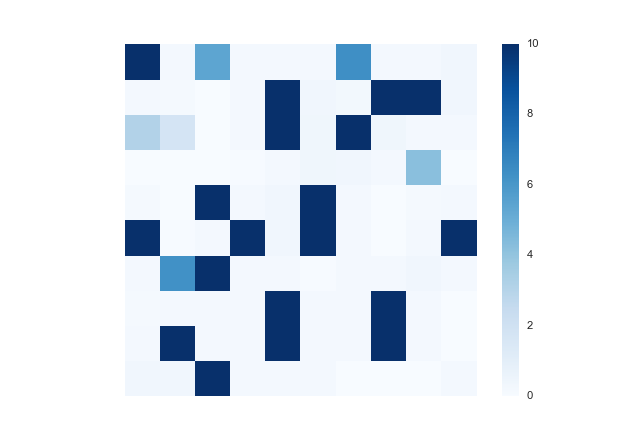

In [102]:
seaborn.heatmap(biomasa_celda, yticklabels=False,
               xticklabels=False, vmin = 0.0, annot=False, fmt=".1f", square=True, vmax=10, cmap="Blues") 

In [ ]:
#Una especie
%matplotlib inline
fig = plt.figure(figsize=(8,8))
seaborn.heatmap(poblacion[30, :, :, 5], yticklabels=False,
               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True)
plt.show() 

In [ ]:
print(riqueza_paisaje(poblacion, 0)[1])
print(riqueza_paisaje(poblacion, 2)[1])
print(riqueza_paisaje(poblacion, 22)[1])
print(riqueza_paisaje(poblacion, 30)[1])

In [ ]:
print(riqueza_agricola(poblacion, paisaje, 0)[1])
print(riqueza_agricola(poblacion, paisaje, 3)[1])
print(riqueza_agricola(poblacion, paisaje, 5)[1])
print(riqueza_agricola(poblacion, paisaje, 30)[1])

In [ ]:
riqueza = np.zeros(poblacion.shape[3])
#riqueza[1] =1
len(riqueza[riqueza > 0.1])

In [ ]:
poblacion[40, :, :, 1]

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# Original de numericalmooc, por Lorena Barba
from IPython.core.display import HTML
css_file = "C:/Users/hp\Desktop/proyectof/style2.css"
HTML(open(css_file, "r").read())